In [38]:
from collections import Counter
import ast
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re
import pickle
import numpy as np

In [ ]:
def get_tuple_from_str(some_col):
    tuple_list = ast.literal_eval(some_col)
    return tuple_list

def get_uniq_from_mult(df):
    data = {'col1': [], 'col2': []}
    for _, row in enumerate(df['tuple']):
        # print(df['tuple'])
        # print(df['num'])
        data['col1'].append(df['num'])
        data['col2'].append(str(row))
    new_df = pd.DataFrame(data)
    return new_df

def format_str(some_tuple):
    new_str = f'{some_tuple[1:-1]}'
    return new_str

def get_ord_num(some_str):
    pattern = r'(\d+)'
    finding = re.findall(pattern, str(some_str))
    # print(finding)
    return finding[0]

def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom')

In [ ]:
# get result dataframe from 4deep_filtration_and_get_dataset.ipynb
df = pd.read_csv('sort_df_all.csv', sep=';', index_col=0)

only_multiple = df.loc[df['block_kind'] == 'multiple']
multiple_uniqs = only_multiple.loc[only_multiple['final_blocks'] != '[]']
uniqs_from_mult = multiple_uniqs.explode('final_blocks')
m = multiple_uniqs['final_blocks'].tolist()
tuple_list = ast.literal_eval(m[1])

# divide multiple blocks to unique single text blocks
uniqs_from_mult['tuples'] = uniqs_from_mult['final_blocks'].apply(get_tuple_from_str)
uniqs = uniqs_from_mult.explode('tuples')
del uniqs['final_blocks']
# uniqs.to_csv('uniqs_from_mult.csv', sep=';', encoding = 'utf8') # save results to csv

uniqs = pd.read_csv('uniqs_from_mult.csv', sep=';', encoding='utf8')
uniqs['tuples'] = uniqs['tuples'].astype(str)

uniqs['tuples'] = uniqs['tuples'].apply(format_str)
uniqs = uniqs.reset_index()
uniqs = uniqs.rename(columns = {'tuples' : 'final_blocks'})

del uniqs['Unnamed: 0']
del uniqs['level_0']
del uniqs['index']

new_order = ['paths', 'num_of_page', 'blocktext', 'block_kind', 'final_blocks', 'cut_paths', 'year', 'jpg_num', 'num_edition']

uniqs = uniqs[new_order]

new_df = get_uniq_from_mult(uniqs)

In [2]:
# STATISTICS
main_df = pd.read_csv('single_blocks.csv', sep=';')
from_mult_df = pd.read_csv('uniqs_from_mult.csv', sep=';', index_col=0)

In [5]:
common_df = pd.concat([main_df, from_mult_df]).reset_index()
del common_df['index']
common_df.reset_index(inplace = True)
common_df['ord_num'] = common_df['final_blocks'].apply(get_ord_num)

In [27]:
# save common_df to pickle
# with open('common_df.pickle', 'wb') as f:
#     pickle.dump(common_df, f)

# save common_df to csv
# common_df.to_csv('common_df.csv', sep = ';', encoding='utf8')

In [21]:
year_count = Counter(common_df['year'].to_list())

In [23]:
year_count

Counter({1971: 94318,
         1973: 88322,
         1974: 88247,
         1975: 87649,
         1977: 87641,
         1976: 85769,
         1979: 85331,
         1972: 84915,
         1978: 82461,
         1970: 77093,
         1969: 76903,
         1968: 74758,
         1960: 72857,
         1964: 71806,
         1959: 70077,
         1965: 67820,
         1961: 67374,
         1967: 67323,
         1966: 64744,
         1963: 64443,
         1962: 62538})

In [29]:
year_dict = dict(year_count)

In [33]:
year_df = pd.DataFrame(list(year_dict.items()), columns=['year', 'count'])

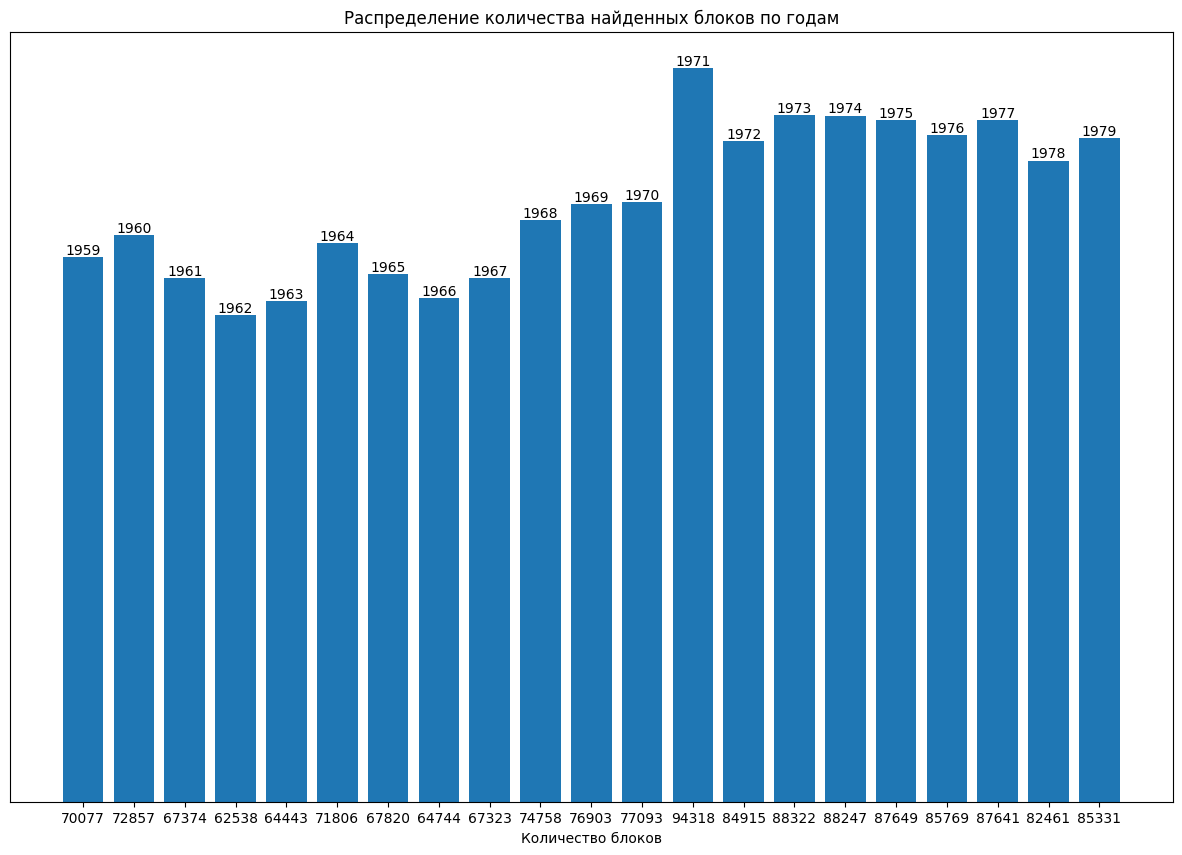

In [60]:
# Distribution of the number of blocks found by year
years = year_df['year']
values = year_df['count']

fig = plt.figure(figsize = (15, 10))
bars = plt.bar(years, values)
ax = plt.gca()
autolabel(ax.patches, years, height_factor=1)
plt.xticks(years, values)
plt.xlabel("Количество блоков")
plt.title("Распределение количества найденных блоков по годам")
ax.get_yaxis().set_ticks([])
# plt.savefig('years_count_blocks.png')